## Descripción
Predicción de síntomas en un paciente con una cepa específica del virus Zika usando datos clínicos específicos y métodos de Machine Learning.
?? Sólo tenemos un output. Yo digo que es si muere o no.
## Métodos
Muchos
**Procesado de datos**
- Buscar errores o missing values y eliminar estas filas.
    No había ninguno.
- Cambiar escala de features.
    Ya están estandarizadas.
    
- Feature Selection.
    Probamos pero no lo hacemos por ser características médicas.
    
- Balanceo de clases.
    Hacemos undersampling para balancear.
- Separación en conjuntos de entrenamiento, validación y test.

**Machine Learning**

- Use any method of ML / Deep Learning you consider to obtain the best model for your task/problem.
- Use metrics of ML to decide the best model.
- Save the model if possible as file.

## Resultados y discusión

In [17]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler    
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import (train_test_split, GridSearchCV,
                                     ParameterGrid)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, ShuffleSplit

In [2]:
# Cargamos dataset
df = pd.read_csv(os.path.join('ds_Zika.csv'))

In [3]:
# Comprobamos si falta algún valor
attr = []
# Iteramos los atributos del dataset
for i in df.columns:
    # Comprobamos los valores de cada atributo
    attr.append(np.all(df[i].notna()))
# Ningún atributo tiene missing values:
np.all(np.array(attr))

True

In [37]:
import itertools as it

In [70]:
# from sklearn.feature_selection import VarianceThreshold
# Comprobamos si hay variables con "near-zero variance":
print(df.columns[df.std(axis=0) <= 0.001])

Index(['DSh(I)005_qr', 'DSh(I)009_qr'], dtype='object')


In [ ]:
# Eliminamos esas columnas
df = df.drop(columns=[df.columns[5],df.columns[9]])

In [71]:
# Comprobamos si hay variables iguales:
resultados = np.zeros((len(df.columns), len(df.columns)))

for i in range(len(df.columns)):
    for j in range(len(df.columns)):
            resultados[i, j] = np.mean(df.iloc[:, i] == df.iloc[:, j])

for i, j in it.combinations(range(len(df.columns)), 2):
    if round(resultados[i, j], 4) == 1:
        print(i, j)

30 38


In [ ]:
# Eliminamos esas columnas
df = df.drop(columns=[df.columns[30],df.columns[38]])

In [19]:
# Balanceo de clases
# Comprobamos la proporción
np.mean(df["Output"])

0.18557084417999256

In [38]:
# Undersampling
df_u = df.copy()
# Número de casos positivos
nposit = len(df_u[df_u['Output'] == 1])
# Índices de casos negativos
inegat = df_u[df_u.Output == 0].index
# Cogemos aleatoriamente un número de índices negativos igual al número de casos positivos
random_indices = np.random.choice(inegat, nposit, replace=False)
# Obtenemos todos los índices positivos
iposit = df_u[df_u.Output == 1].index
# Unimos las dos listas de índices
new_indices = np.concatenate([iposit, random_indices])
df_u = df_u.loc[new_indices]
# y las desordenamos
df_u = shuffle(df_u).reset_index(drop=True)

X = df_u.drop('Output', axis=1)
y = df_u['Output']

Xdata = X.values
ydata = y.values

In [6]:
# Oversampling
df_o = df.copy()
X = df_o.drop('Output', axis=1)
y = df_o['Output']
Xdata = X.values
ydata = y.values
Xdata, ydata = SMOTE().fit_resample(Xdata, ydata)

In [ ]:
# Separación en conjuntos de entrenamiento y test:
#ssplit = ShuffleSplit(n_splits=100, test_size=0.2)
#for i_train, i_test in ssplit.split(Xdata):

In [ ]:
# Suprimimos warnings para legibilidad (nota: no recomendamos hacer esto)
import warnings
warnings.filterwarnings("ignore")

In [9]:
# K Neighbors
knb = KNeighborsClassifier()

# LDC:
ldc = LinearDiscriminantAnalysis()

# Bayesian:
gnb = GaussianNB()

# Multilayer Perceptron
mlp = MLPClassifier()

# SVM:
svm = SVC()

# Random Forest
rndf = RandomForestClassifier()

models = [knb, ldc, gnb, mlp, svm, rndf]
model_names = ['KNeighborsClassifier', 'LinearDiscriminantAnalysis', 'GaussianNB', 'MLPClassifier', 'SVC', 'RandomForestClassifier']
scores = []
for i,model in enumerate(models):
    score = cross_val_score(model, Xdata, ydata, cv=10)
    print(model_names[i], ' - Mean:', np.mean(score), ' - Standard Deviation:', np.std(score))

KNeighborsClassifier  - Mean: 0.9499999999999998  - Standard Deviation: 0.011926902179551557


C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\iago_\Anacond

LinearDiscriminantAnalysis  - Mean: 0.8751141552511414  - Standard Deviation: 0.0068721081932842125
GaussianNB  - Mean: 0.7885844748858448  - Standard Deviation: 0.01345676897560855


C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

MLPClassifier  - Mean: 0.9617579908675798  - Standard Deviation: 0.009581563729563132


C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

SVC  - Mean: 0.8638127853881279  - Standard Deviation: 0.01412068618297937


C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

RandomForestClassifier  - Mean: 0.9724885844748858  - Standard Deviation: 0.011912142847690595


C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


NameError: name 'warnings' is not defined

In [ ]:
# Reactivamos warnings
warnings.filterwarnings("default")

In [39]:
X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata,
                                                    test_size=0.25,
                                                    stratify=ydata)

param_grid = {'n_estimators': range(1, 101, 10),
               'max_depth': range(1, 26, 5),
               'min_samples_leaf': range(1, 11, 5)}

alg = RandomForestClassifier(random_state=1234)
grid = GridSearchCV(alg, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print('validation accuracy:', grid.score(X_train, y_train))
print('test accuracy:', grid.score(X_test, y_test))


{'max_depth': 11, 'min_samples_leaf': 1, 'n_estimators': 21}
validation accuracy: 0.9846359385437542
test accuracy: 0.9238476953907816


In [44]:
c = pd.DataFrame(grid.cv_results_)
c['train_test_difference'] = c.mean_train_score - c.mean_test_score
max_diff = 0.025
min_test_score = 0.90
c_sorted = c[(c.mean_test_score >= min_test_score) & (c.train_test_difference <= max_diff)][(
    ['mean_train_score', 'mean_test_score','train_test_difference'])].sort_values('mean_test_score', ascending=False)
print(c_sorted)
i = c_sorted.first_valid_index()
max_depth = c.param_max_depth.iloc[i]
min_samples_leaf = c.param_min_samples_leaf.iloc[i]
n_estimators = c.param_n_estimators.iloc[i]
print('Max depth: {} - Min. samples leaf: {} - Num. estimators: {}'.format(max_depth, min_samples_leaf, n_estimators))

    mean_train_score  mean_test_score  train_test_difference
21          0.927037         0.902472               0.024566
24          0.926220         0.901804               0.024417
Max depth: 6 - Min. samples leaf: 1 - Num. estimators: 11


In [45]:
best = RandomForestClassifier(random_state=1234, max_depth=max_depth, min_samples_leaf=min_samples_leaf, n_estimators=n_estimators)
best.fit(X_train, y_train)
print('training accuracy:', best.score(X_train, y_train))
print('test accuracy:', best.score(X_test, y_test))

training accuracy: 0.9325317301269205
test accuracy: 0.9038076152304609


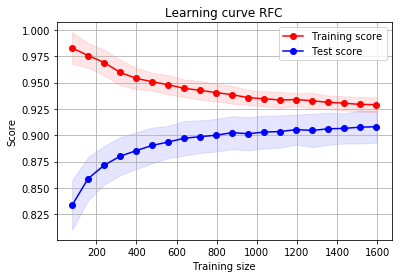

In [46]:
cv = ShuffleSplit(n_splits=100, test_size=0.2)
train_sizes = np.linspace(0.05, 1, num=20)
train_sizes, train_scores, test_scores = learning_curve(
        best, Xdata, ydata, cv=cv, train_sizes=train_sizes)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# plot
plt.figure()
plt.title('Learning curve RFC')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='b')
plt.plot(train_sizes, train_scores_mean, 'ro-', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'bo-', label='Test score')
plt.legend(loc='best')
plt.show()

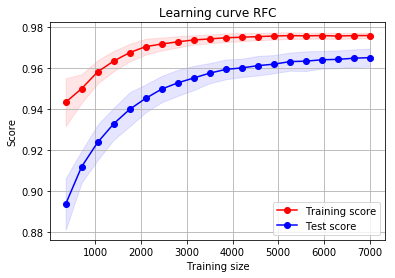

In [36]:
cv = ShuffleSplit(n_splits=100, test_size=0.2)
train_sizes = np.linspace(0.05, 1, num=20)
train_sizes, train_scores, test_scores = learning_curve(
        best, Xdata, ydata, cv=cv, train_sizes=train_sizes)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# plot
plt.figure()
plt.title('Learning curve RFC')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='b')
plt.plot(train_sizes, train_scores_mean, 'ro-', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'bo-', label='Test score')
plt.legend(loc='best')
plt.show()

In [24]:
from sklearn.metrics import roc_auc_score

In [29]:
ypred = best.predict(X_test)
auroc = roc_auc_score(y_test, ypred)

In [30]:
auroc

0.9671232876712329

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_test, ypred)

array([[1062,   33],
       [  39, 1056]], dtype=int64)